In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sc
import sklearn as sk

In [2]:
home = os.getcwd()
print(os.listdir(home))

['.git', '.gitignore', '.ipynb_checkpoints', '01-08-19-V118', '01-08-19-V118_ch1.big', '01-08-19-V118_ch1.dat', '01-08-19-V118_ch2.dat', '03-05-19-V118', '03-26-19-V118', '08-14-18-V118', '08-14-18-V118_ch1.dat', '08-14-18-V118_ch2.dat', 'Consolidated Snooper Log for Test train 6-188 - Mar. 5.xlsx', 'data_prep.ipynb', 'data_prep_development.ipynb', 'data_prep_final.ipynb', 'EDA.ipynb', 'EDA2.ipynb', 'eda2_b.ipynb', 'EDA3.ipynb', 'GPS Files', 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx', 'M-Line and EVGL.zip', 'RE Location of accelerometer for vibration measurements.pdf', 'REC0001_ch1.dat', 'REC0001_ch2.dat', 'REC0002_ch1.dat', 'REC0002_ch2.dat', 'Rec1', 'Rec2', 'Rec3', 'Rec4', 'Rec5', 'Rec6', 'Skytrain Linear Asset Database - Consolidated.xlsx', 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx', 'Switch Maint Works to date - April 2019.xlsx', 'Test Train 118 Orientations.pdf', 'Test Train Sample Noise Data', 'Test Train Sample Noise Data.zip', 'Untitled.ipynb']


In [3]:
df = pd.read_csv("01-08-19-V118_ch1.big", index_col = 0)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 7199
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 14.3 MB
None
                 0           10           20           30           40  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000   
mean      0.005069     0.003802     0.007437     0.008419     0.009513   
std       0.009525     0.004414     0.008195     0.009957     0.011075   
min       0.000518     0.000175     0.000125     0.000089     0.000072   
25%       0.001583     0.000655     0.001041     0.001318     0.001650   
50%       0.002594     0.003006     0.005585     0.005934     0.007183   
75%       0.004430     0.004940     0.010577     0.011499     0.012790   
max       0.088339     0.076737     0.088878     0.132022     0.114456   

                50           60           70           80           90  ...  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000  ...   
mean      0.007703

0        10        20        30        40        50        60  \
0  0.002283  0.001861  0.001776  0.002652  0.004631  0.009036  0.007076   
1  0.002964  0.002919  0.003401  0.003421  0.005504  0.007987  0.007737   
2  0.004012  0.003644  0.004012  0.004476  0.006040  0.007929  0.008039   
3  0.001981  0.002050  0.003021  0.002484  0.004625  0.006709  0.007154   
4  0.001982  0.001520  0.002056  0.002422  0.006100  0.005771  0.007166   

         70        80        90  ...      2500      2510      2520      2530  \
0  0.006394  0.007697  0.016918  ...  0.000755  0.000842  0.000599  0.000773   
1  0.006090  0.006359  0.010426  ...  0.000846  0.000544  0.000791  0.000900   
2  0.007646  0.011035  0.015947  ...  0.000720  0.000657  0.000606  0.000494   
3  0.006420  0.006462  0.014294  ...  0.000838  0.000644  0.000537  0.000621   
4  0.006682  0.012416  0.018304  ...  0.000747  0.000592  0.000976  0.000469   

       2540      2550  mean_acc    median    95_acc   max_acc  
0  0.000858  0.000763  1.005810  0.776660  2.712247  5.670169  
1  0.000853  0.000741  1.101199  0.903683  2.766267  5.752741  
2  0.000623  0.000525  1.064041  0.893963  2.720738  4.977062  
3  0.000756  0.000611  1.025190  0.823598  2.650148  5.570080  
4  0.000558  0.000575  1.026970  0.808940  2.780191  6.191072  

[5 rows x 260 columns]

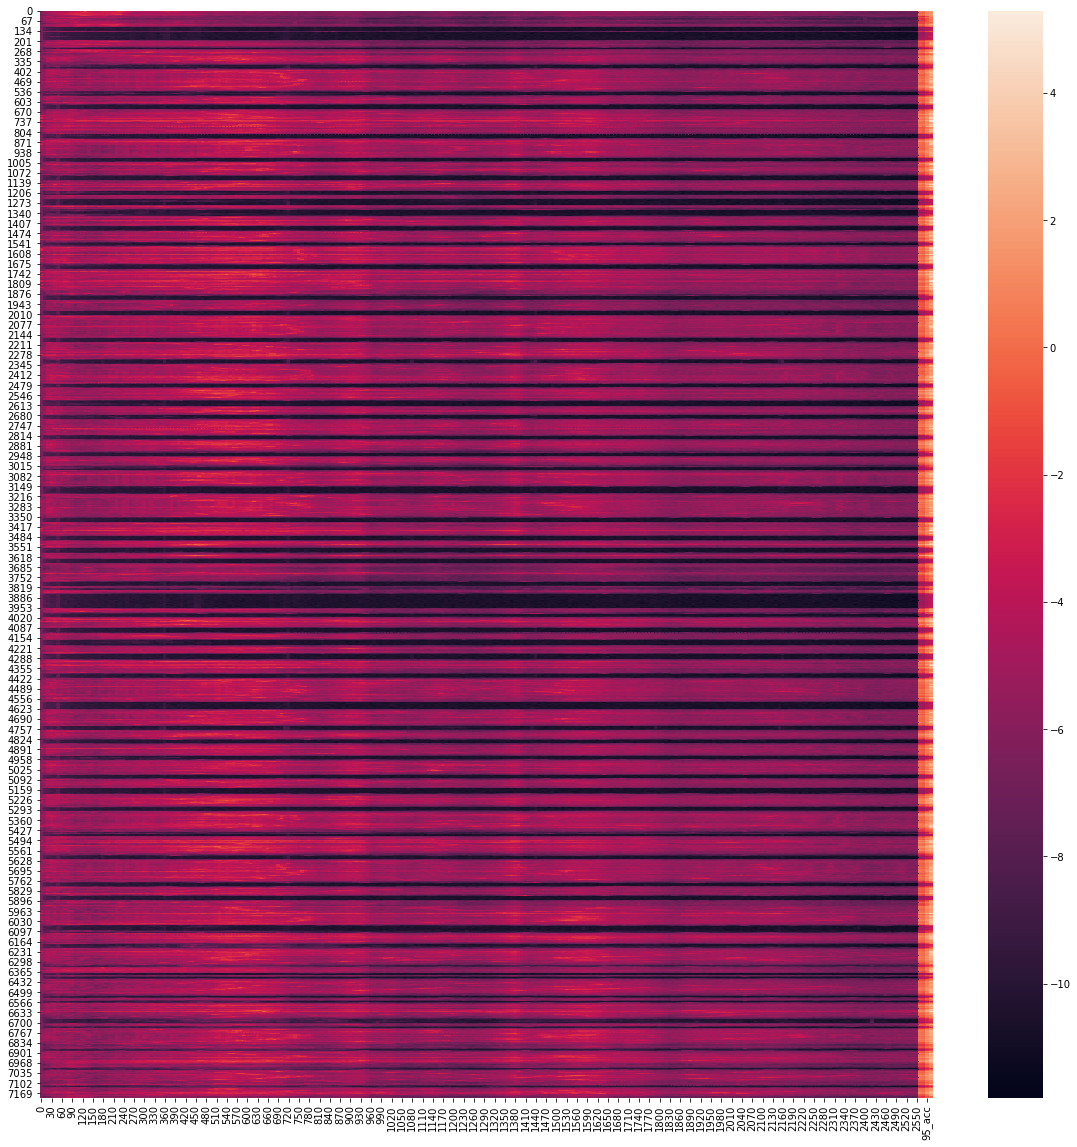

In [4]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df))
plt.show()

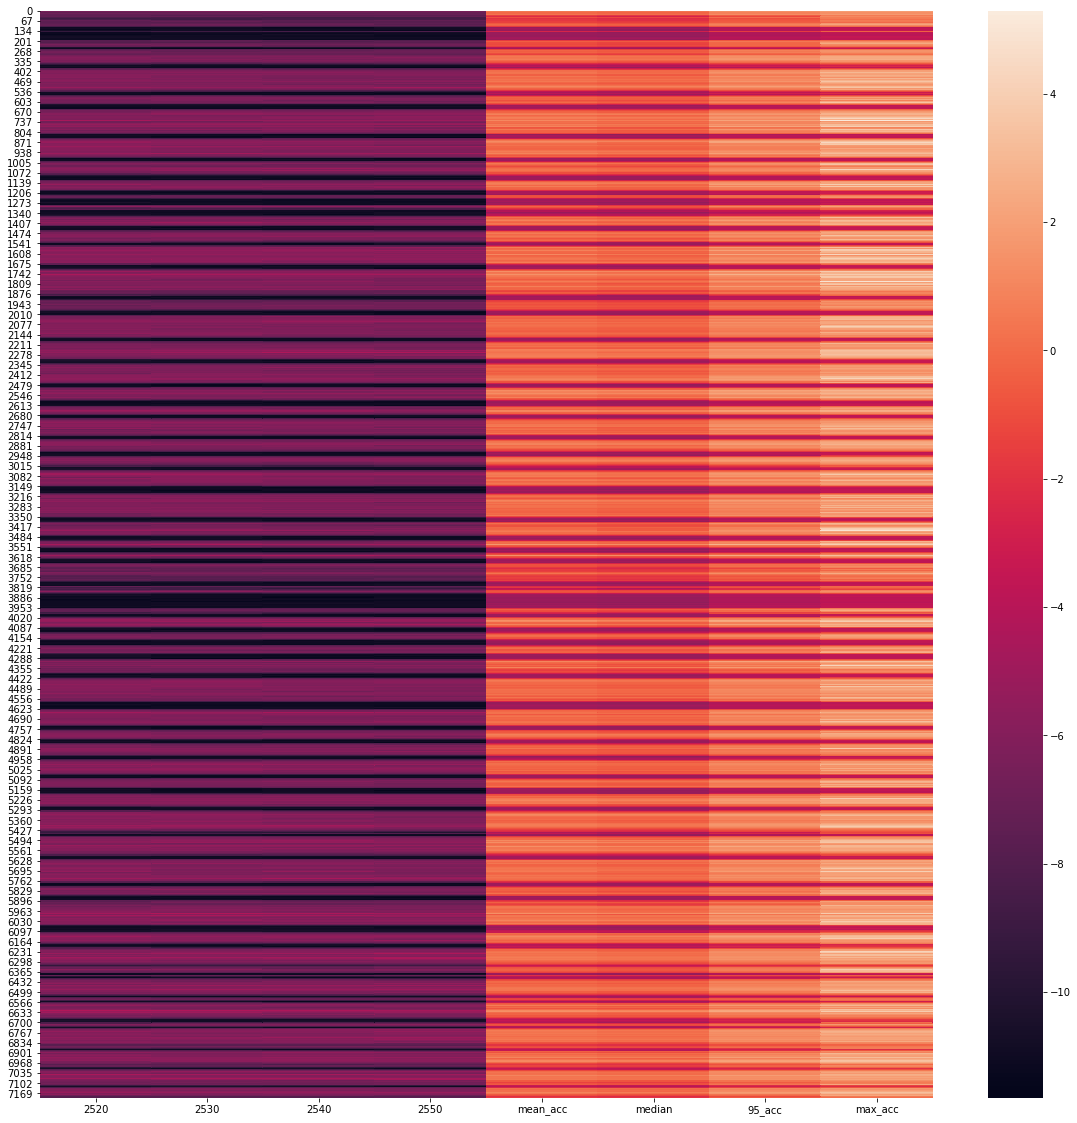

In [5]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df.iloc[:,-8:]))
plt.show()

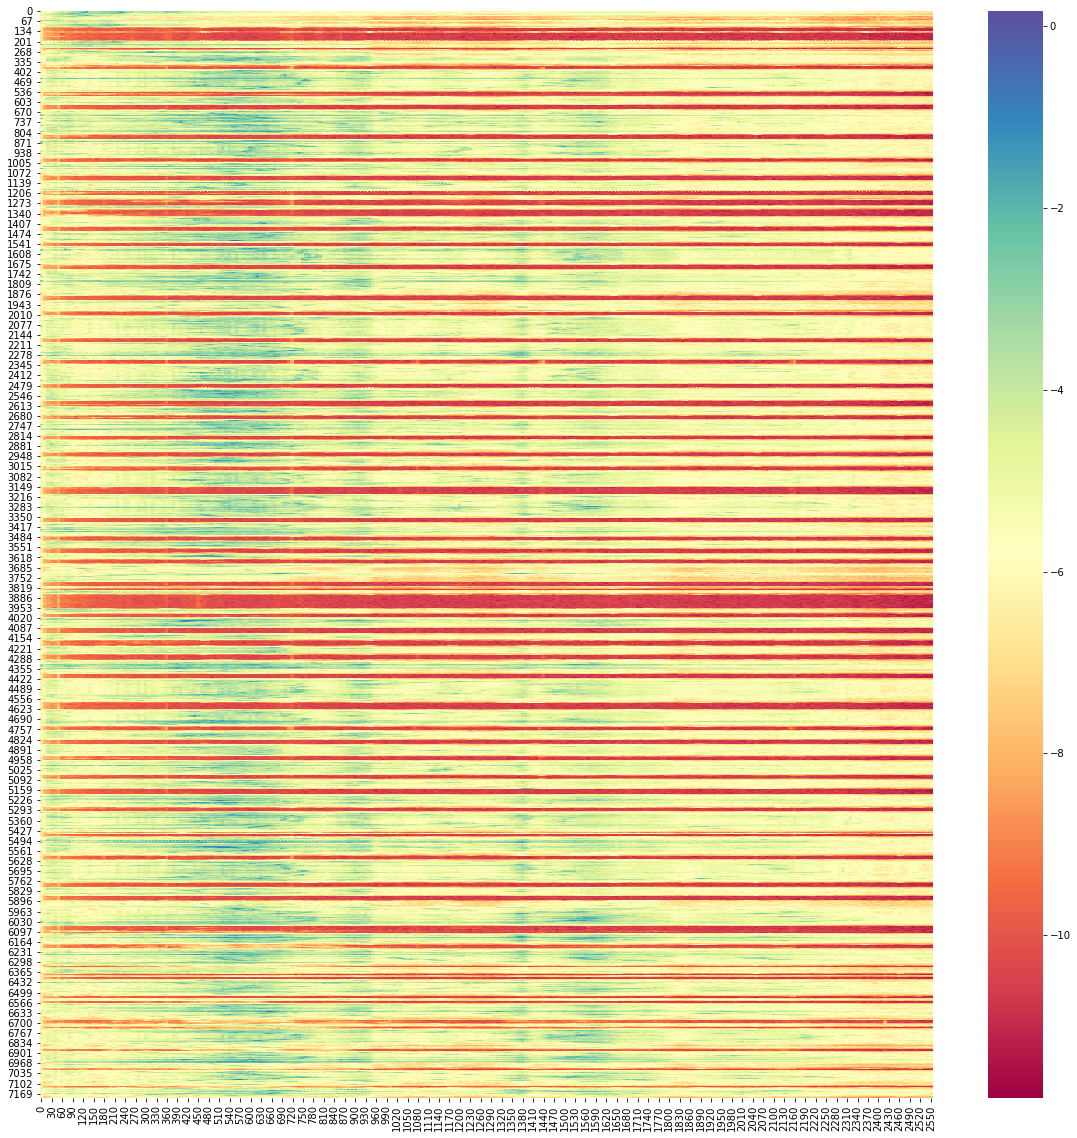

In [6]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df.iloc[:,:-4]), cmap="Spectral")
plt.show()

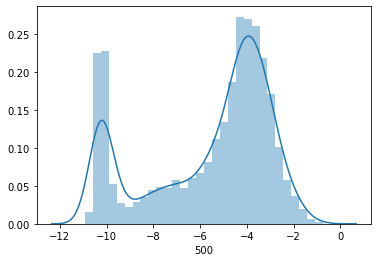

In [7]:
sb.distplot(np.log(df.iloc[:,50]), bins=30)

In [8]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components =2).fit(np.log(df))

In [9]:
gm_lab = GaussianMixture(n_components =2).fit_predict(np.log(df))

In [10]:
df_1 = np.log(df.iloc[:,:-4])
df_2 = pd.merge(df_1, df.iloc[:,-4:], how="left", left_index=True, right_index=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 7199
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 14.6 MB


In [11]:
df_2.head()

0        10        20        30        40        50        60  \
0 -6.082353 -6.286568 -6.333274 -5.932432 -5.374962 -4.706569 -4.951070   
1 -5.821350 -5.836668 -5.683540 -5.677716 -5.202271 -4.829967 -4.861692   
2 -5.518527 -5.614698 -5.518535 -5.408998 -5.109433 -4.837172 -4.823488   
3 -6.224263 -6.190058 -5.802186 -5.997711 -5.376236 -5.004238 -4.940051   
4 -6.223832 -6.489103 -6.186964 -6.022991 -5.099490 -5.154884 -4.938470   

         70        80        90  ...      2500      2510      2520      2530  \
0 -5.052426 -4.866931 -4.079390  ... -7.188443 -7.079240 -7.420014 -7.165071   
1 -5.101126 -5.057943 -4.563477  ... -7.075568 -7.517063 -7.141922 -7.013238   
2 -4.873604 -4.506639 -4.138504  ... -7.236064 -7.328439 -7.408516 -7.613233   
3 -5.048331 -5.041775 -4.247912  ... -7.084879 -7.348196 -7.529704 -7.383376   
4 -5.008371 -4.388765 -4.000632  ... -7.199484 -7.431769 -6.931608 -7.664187   

       2540      2550  mean_acc    median    95_acc   max_acc  
0 -7.060624 -7.178198  1.005810  0.776660  2.712247  5.670169  
1 -7.067009 -7.207820  1.101199  0.903683  2.766267  5.752741  
2 -7.380646 -7.552975  1.064041  0.893963  2.720738  4.977062  
3 -7.186873 -7.400337  1.025190  0.823598  2.650148  5.570080  
4 -7.491341 -7.461897  1.026970  0.808940  2.780191  6.191072  

[5 rows x 260 columns]

In [12]:
df_2["gm_lab"] = (gm_lab *5) - 10

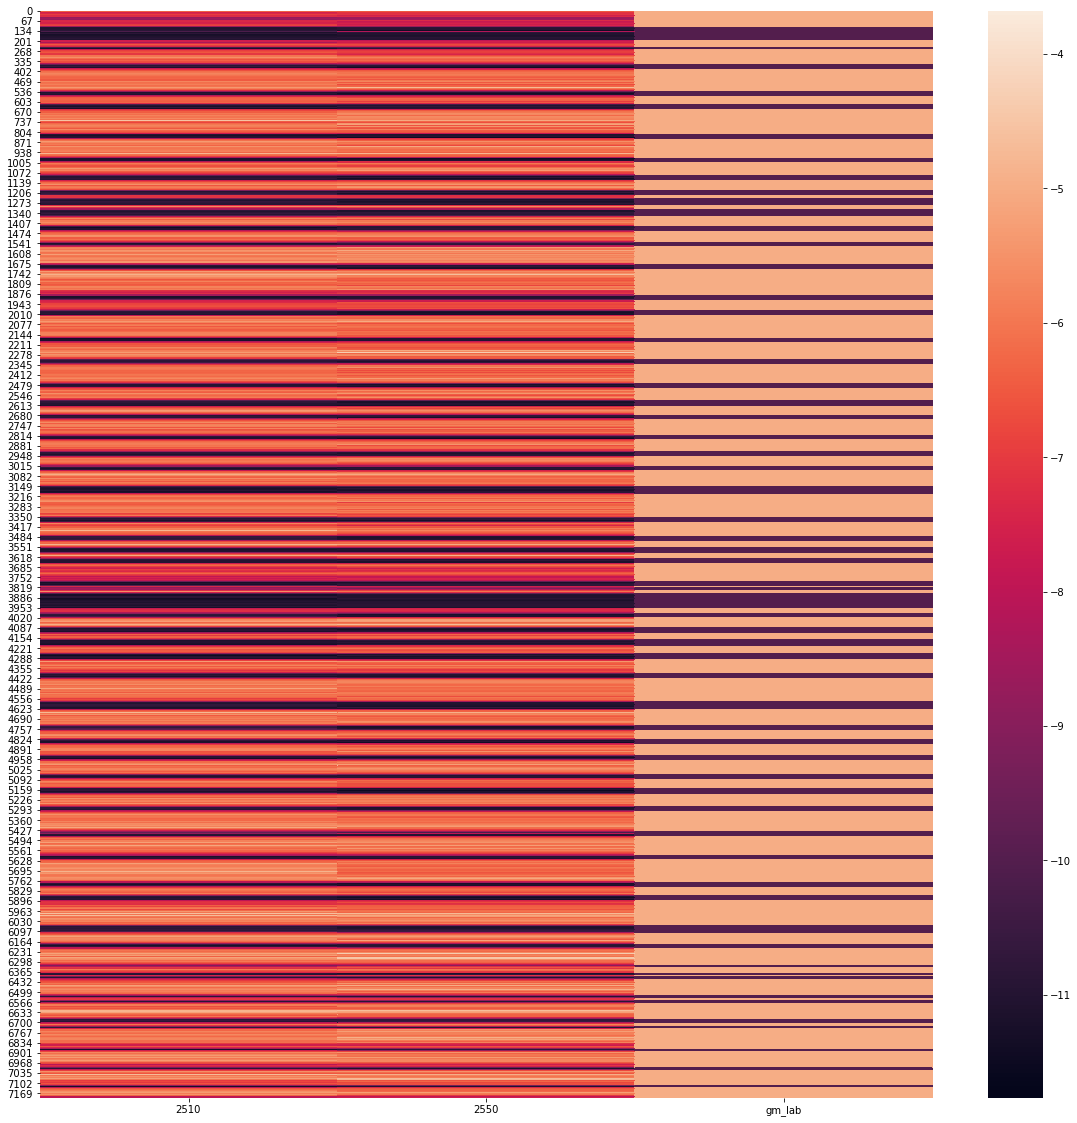

In [13]:
plt.figure(figsize=(20,20))
sb.heatmap(df_2.iloc[:, [50, -6, -1]])
plt.show()

In [14]:
moving = df_2[df_2["gm_lab"] != -5]
moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 108 to 7133
Columns: 261 entries, 0 to gm_lab
dtypes: float64(260), int64(1)
memory usage: 3.9 MB


In [15]:
stopped = df_2[df_2["gm_lab"] == -5]
stopped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 0 to 7199
Columns: 261 entries, 0 to gm_lab
dtypes: float64(260), int64(1)
memory usage: 10.5 MB


In [16]:
stopped.mean()

0           -5.543780
10          -5.554401
20          -4.894279
30          -4.784927
40          -4.631230
              ...    
mean_acc     0.976645
median       0.769050
95_acc       2.558661
max_acc     10.954934
gm_lab      -5.000000
Length: 261, dtype: float64

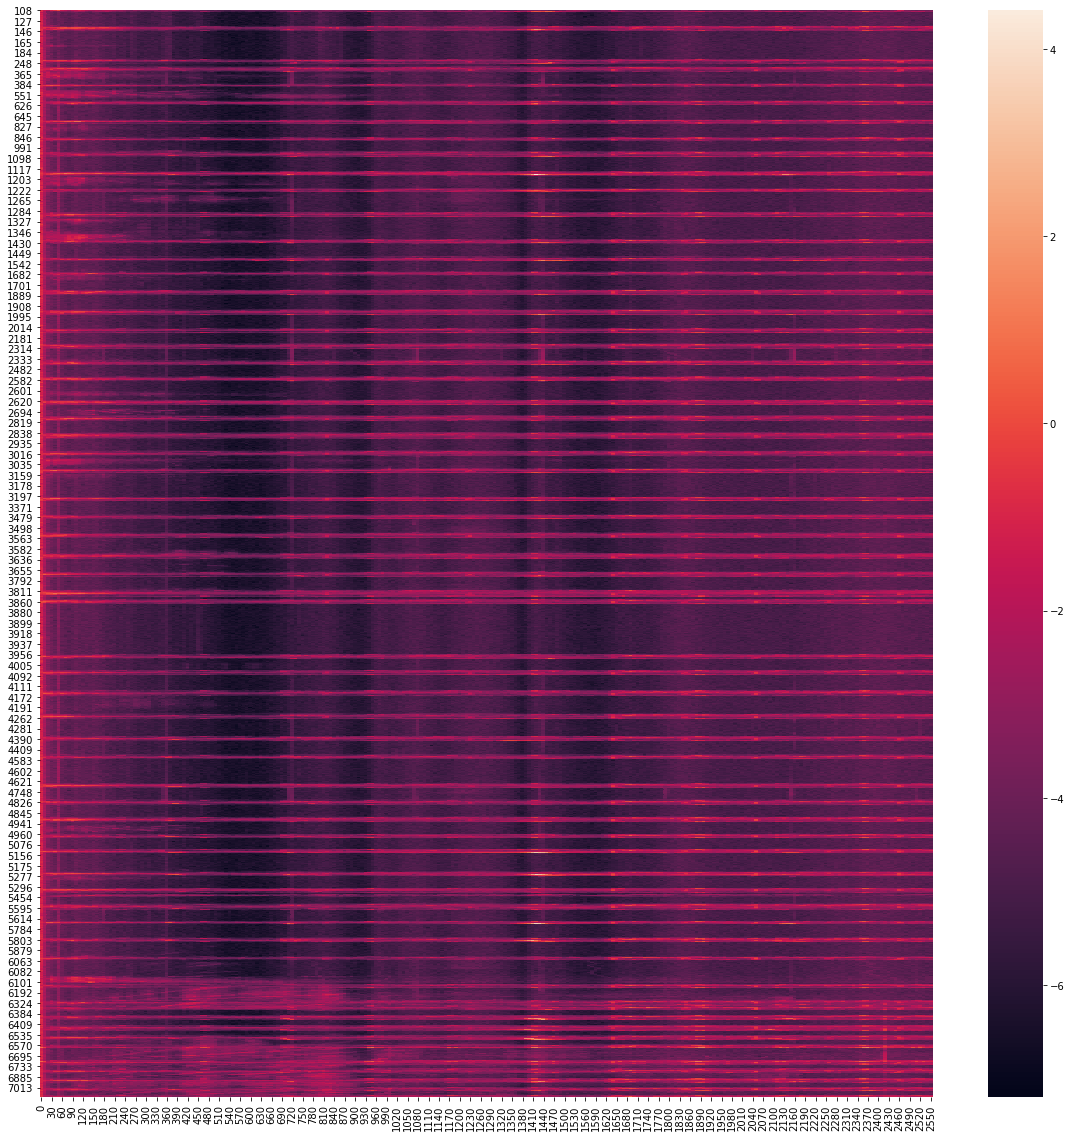

In [17]:
plt.figure(figsize=(20,20))
sb.heatmap((moving - stopped.mean()).iloc[:,:-5])
plt.show()


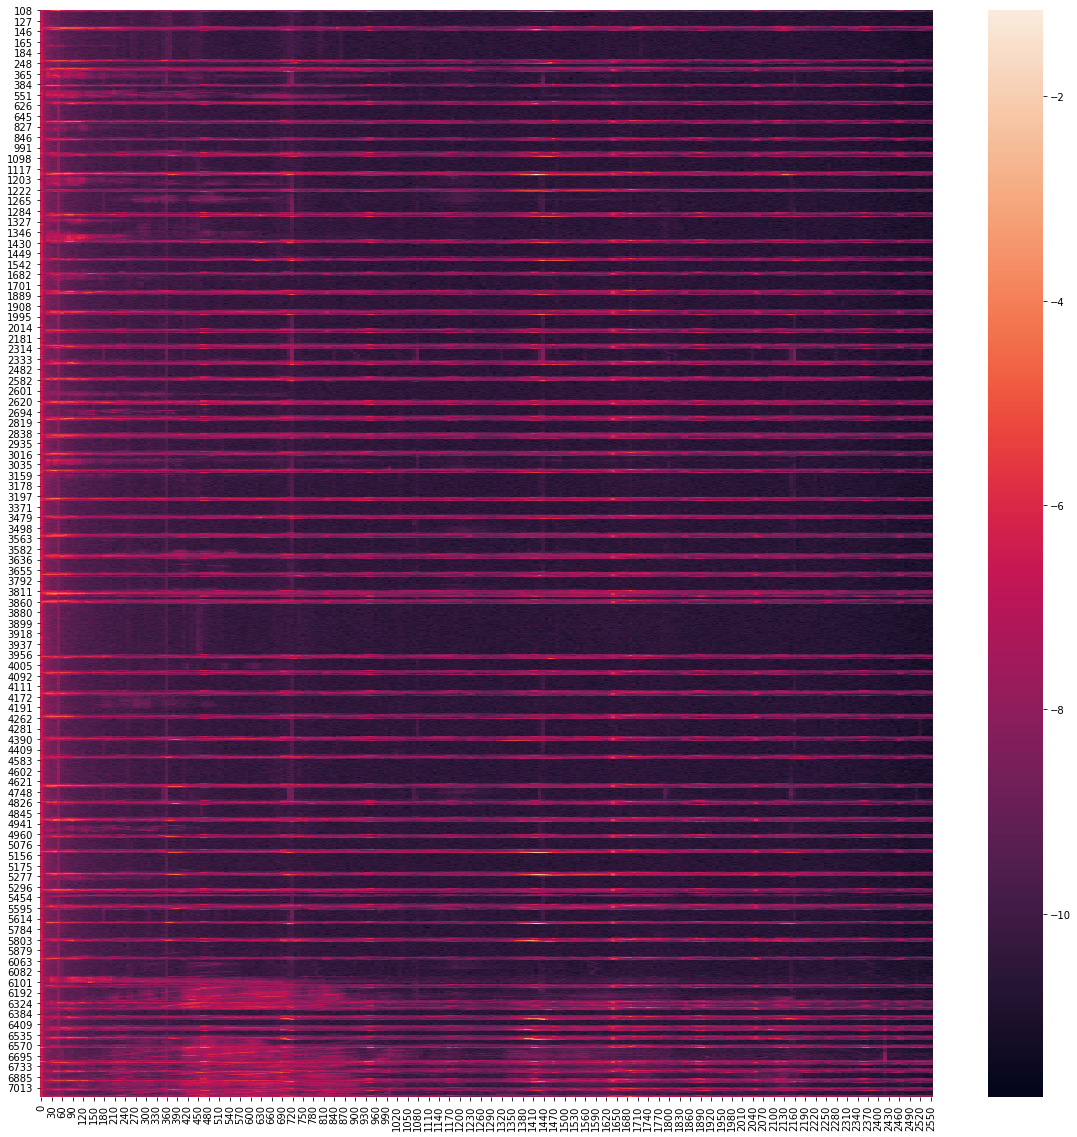

In [18]:
plt.figure(figsize=(20,20))
sb.heatmap(moving.iloc[:,:-5])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


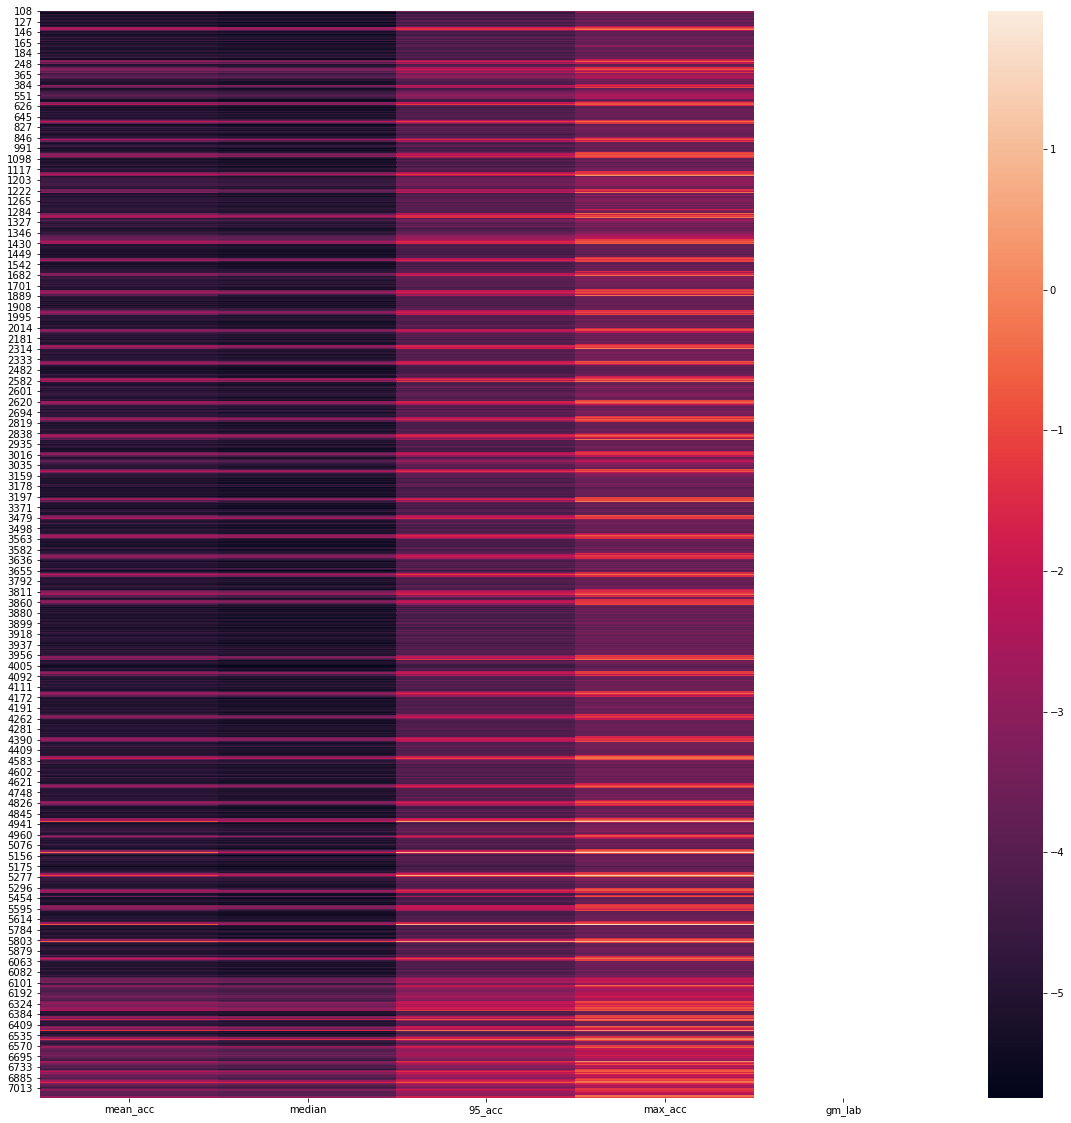

In [19]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(moving.iloc[:,-5:]))
plt.show()

In [20]:
from sklearn.cluster import KMeans as km
five = km(n_clusters=5, random_state=42).fit(moving)

In [21]:
five.labels_.mean()

1.3773006134969326

In [22]:
new_col = {"km_5":five.labels_}

In [23]:
new_col_series  = pd.DataFrame(new_col)

In [24]:
m2 = moving.copy()

In [25]:
m3 = m2.copy()

In [26]:
m3["km_5"] = five.labels_

In [27]:
m3.head()
m3 = m3.reset_index()
s2 = stopped.reset_index()
s2.head()

index         0        10        20        30        40        50  \
0      0 -6.082353 -6.286568 -6.333274 -5.932432 -5.374962 -4.706569   
1      1 -5.821350 -5.836668 -5.683540 -5.677716 -5.202271 -4.829967   
2      2 -5.518527 -5.614698 -5.518535 -5.408998 -5.109433 -4.837172   
3      3 -6.224263 -6.190058 -5.802186 -5.997711 -5.376236 -5.004238   
4      4 -6.223832 -6.489103 -6.186964 -6.022991 -5.099490 -5.154884   

         60        70        80  ...      2510      2520      2530      2540  \
0 -4.951070 -5.052426 -4.866931  ... -7.079240 -7.420014 -7.165071 -7.060624   
1 -4.861692 -5.101126 -5.057943  ... -7.517063 -7.141922 -7.013238 -7.067009   
2 -4.823488 -4.873604 -4.506639  ... -7.328439 -7.408516 -7.613233 -7.380646   
3 -4.940051 -5.048331 -5.041775  ... -7.348196 -7.529704 -7.383376 -7.186873   
4 -4.938470 -5.008371 -4.388765  ... -7.431769 -6.931608 -7.664187 -7.491341   

       2550  mean_acc    median    95_acc   max_acc  gm_lab  
0 -7.178198  1.005810  0.776660  2.712247  5.670169      -5  
1 -7.207820  1.101199  0.903683  2.766267  5.752741      -5  
2 -7.552975  1.064041  0.893963  2.720738  4.977062      -5  
3 -7.400337  1.025190  0.823598  2.650148  5.570080      -5  
4 -7.461897  1.026970  0.808940  2.780191  6.191072      -5  

[5 rows x 262 columns]

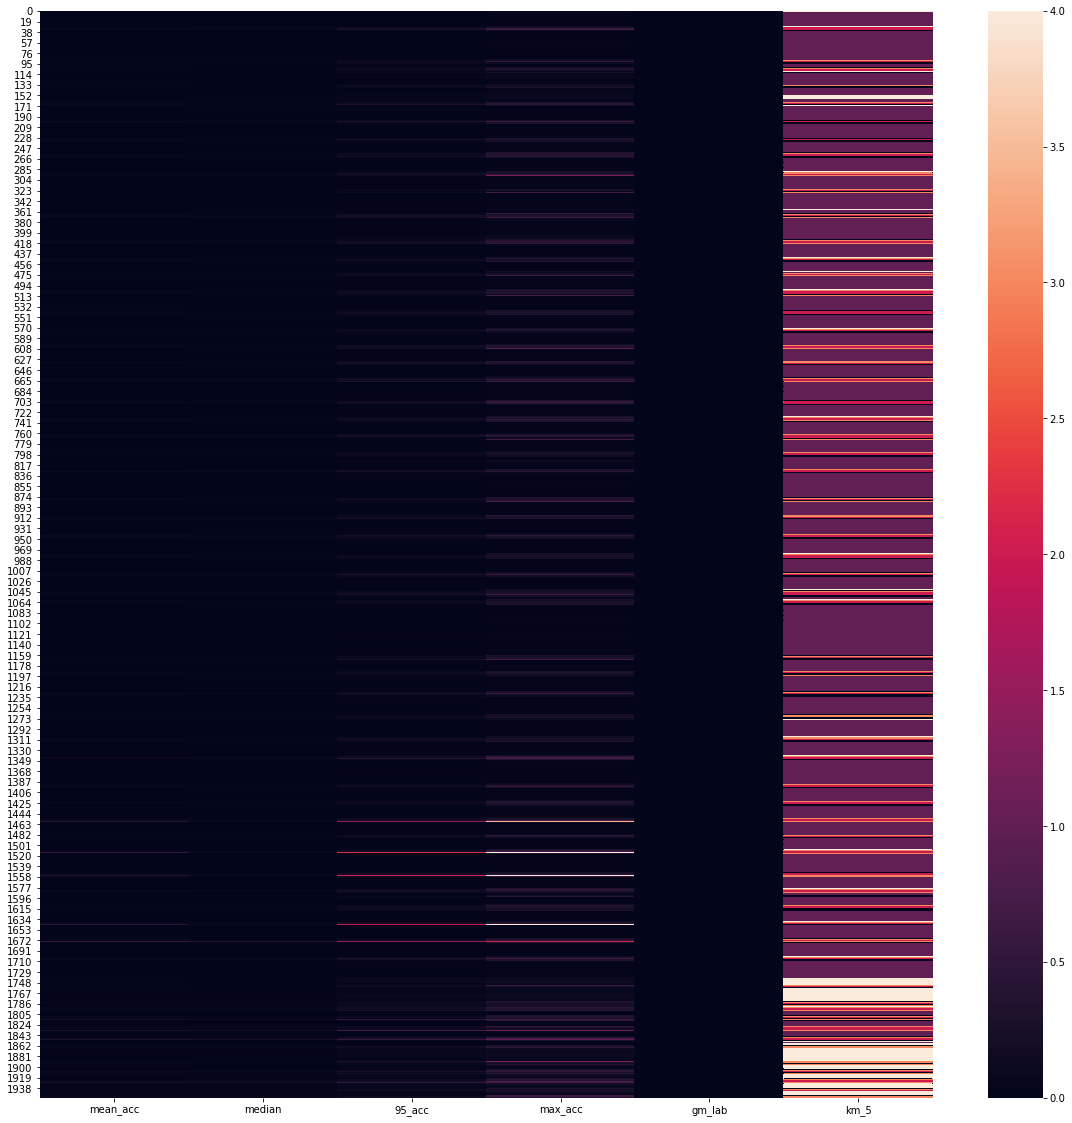

In [28]:
plt.figure(figsize=(20,20))
sb.heatmap(m3.iloc[:,-6:], vmin=0, vmax=4)
plt.show()

In [29]:
rebuild = pd.concat([m3, s2])

In [30]:
rebuild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 5243
Columns: 263 entries, index to km_5
dtypes: float64(261), int64(2)
memory usage: 14.5 MB


In [31]:
rebuild.head()

index         0        10        20        30        40        50  \
0    108 -6.635746 -7.144778 -6.648844 -5.620016 -5.682473 -5.185803   
1    109 -6.461101 -7.157507 -6.949865 -5.976630 -5.376968 -4.785761   
2    110 -6.494308 -8.017296 -6.766989 -7.111982 -7.881963 -7.356564   
3    111 -6.359277 -7.881219 -8.561007 -7.959030 -8.511994 -8.383368   
4    112 -7.290293 -8.226823 -8.754951 -8.315841 -8.852300 -8.866872   

         60        70        80  ...       2520       2530       2540  \
0 -5.494966 -5.221129 -5.589415  ...  -9.702542  -9.640326  -9.678797   
1 -6.380453 -6.835340 -7.294859  ... -10.254050 -10.170351 -10.275762   
2 -7.891768 -8.039793 -8.311450  ... -10.496666 -10.766433 -11.053874   
3 -8.171250 -8.193594 -8.489426  ...  -8.435366  -8.387835  -9.574247   
4 -9.018241 -9.112494 -9.482438  ... -10.957825 -11.135517 -11.055262   

        2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
0  -9.828008  0.058296  0.049020  0.145917  0.262696     -10   2.0  
1 -10.096729  0.039554  0.027803  0.121164  0.242213     -10   4.0  
2 -10.857175  0.011441  0.009785  0.028527  0.051887     -10   4.0  
3  -9.464061  0.043651  0.020825  0.196368  0.425022     -10   0.0  
4 -10.766079  0.004383  0.003372  0.011021  0.055285     -10   1.0  

[5 rows x 263 columns]

In [32]:
rebuild.tail()

index         0        10        20        30        40        50  \
5239   7195 -6.666075 -7.420102 -7.011443 -6.946370 -6.423061 -7.071036   
5240   7196 -6.667156 -7.443242 -7.018839 -6.767122 -6.448493 -6.479705   
5241   7197 -7.005083 -7.404226 -7.194259 -7.055422 -6.129979 -6.670407   
5242   7198 -6.636362 -7.696006 -7.497001 -6.682138 -6.203167 -6.283242   
5243   7199 -6.480461 -7.111040 -6.092157 -5.848601 -5.364399 -5.099290   

            60        70        80  ...      2520      2530      2540  \
5239 -6.820395 -6.639301 -6.014190  ... -7.994750 -8.416975 -8.114385   
5240 -6.611480 -6.402418 -6.058557  ... -8.360120 -8.531228 -8.693667   
5241 -6.632495 -6.255473 -5.091183  ... -8.431289 -8.228996 -8.277665   
5242 -6.211941 -6.107210 -5.384686  ... -7.833445 -7.951112 -7.906849   
5243 -5.167543 -4.486877 -4.154754  ... -7.880348 -7.770349 -7.921338   

          2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
5239 -8.245090  0.086671  0.074394  0.214658  0.416222      -5   NaN  
5240 -8.826022  0.097028  0.082510  0.232525  0.475474      -5   NaN  
5241 -8.004864  0.094560  0.079469  0.233449  0.421002      -5   NaN  
5242 -7.620742  0.108848  0.090406  0.272556  0.525410      -5   NaN  
5243 -7.628194  0.201901  0.155571  0.549562  1.206324      -5   NaN  

[5 rows x 263 columns]

In [33]:
r2 = rebuild.set_index("index")
r2 = r2.sort_index()
# r2 = r2.drop("level_0", axis =1)
r2.km_5 = r2.km_5.fillna(-1)
r2.gm_lab = (r2.gm_lab + 10 ) / 5

In [34]:
r2.head()

0        10        20        30        40        50        60  \
index                                                                         
0     -6.082353 -6.286568 -6.333274 -5.932432 -5.374962 -4.706569 -4.951070   
1     -5.821350 -5.836668 -5.683540 -5.677716 -5.202271 -4.829967 -4.861692   
2     -5.518527 -5.614698 -5.518535 -5.408998 -5.109433 -4.837172 -4.823488   
3     -6.224263 -6.190058 -5.802186 -5.997711 -5.376236 -5.004238 -4.940051   
4     -6.223832 -6.489103 -6.186964 -6.022991 -5.099490 -5.154884 -4.938470   

             70        80        90  ...      2520      2530      2540  \
index                                ...                                 
0     -5.052426 -4.866931 -4.079390  ... -7.420014 -7.165071 -7.060624   
1     -5.101126 -5.057943 -4.563477  ... -7.141922 -7.013238 -7.067009   
2     -4.873604 -4.506639 -4.138504  ... -7.408516 -7.613233 -7.380646   
3     -5.048331 -5.041775 -4.247912  ... -7.529704 -7.383376 -7.186873   
4     -5.008371 -4.388765 -4.000632  ... -6.931608 -7.664187 -7.491341   

           2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
index                                                                  
0     -7.178198  1.005810  0.776660  2.712247  5.670169     1.0  -1.0  
1     -7.207820  1.101199  0.903683  2.766267  5.752741     1.0  -1.0  
2     -7.552975  1.064041  0.893963  2.720738  4.977062     1.0  -1.0  
3     -7.400337  1.025190  0.823598  2.650148  5.570080     1.0  -1.0  
4     -7.461897  1.026970  0.808940  2.780191  6.191072     1.0  -1.0  

[5 rows x 262 columns]

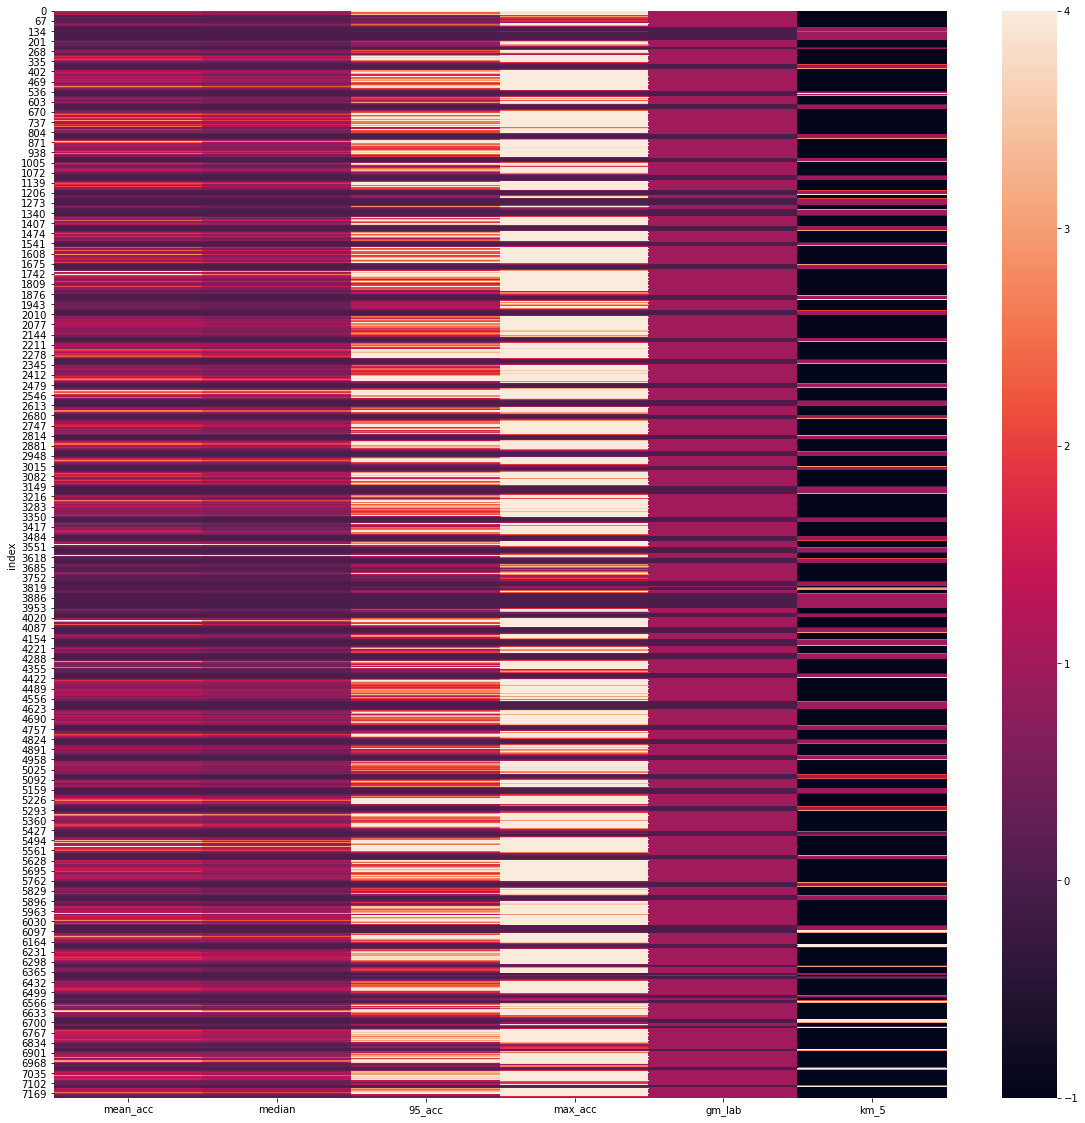

In [35]:
plt.figure(figsize=(20,20))
sb.heatmap(r2.iloc[:,-6:], vmin=-1, vmax=4)
plt.show()

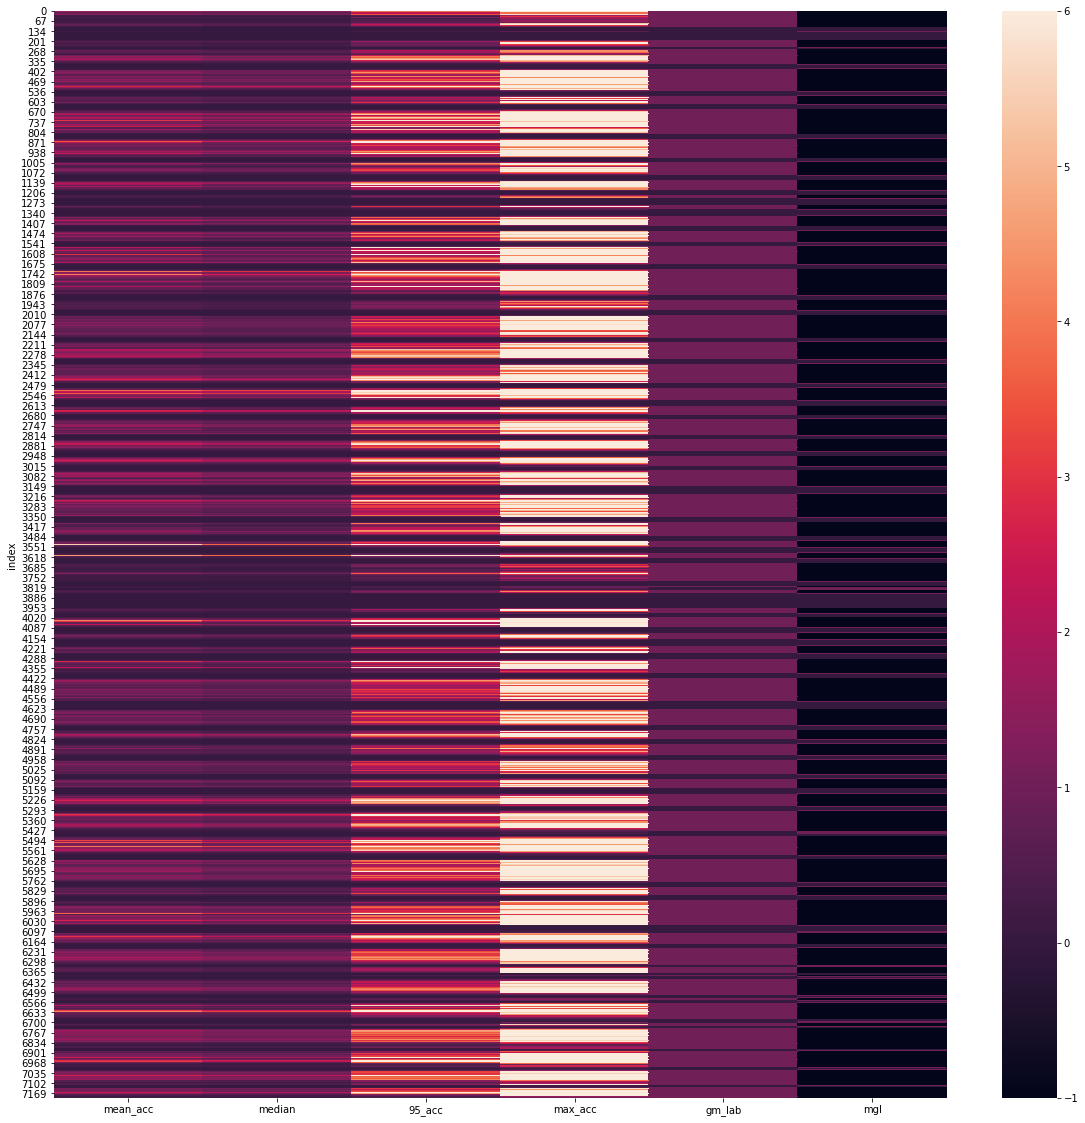

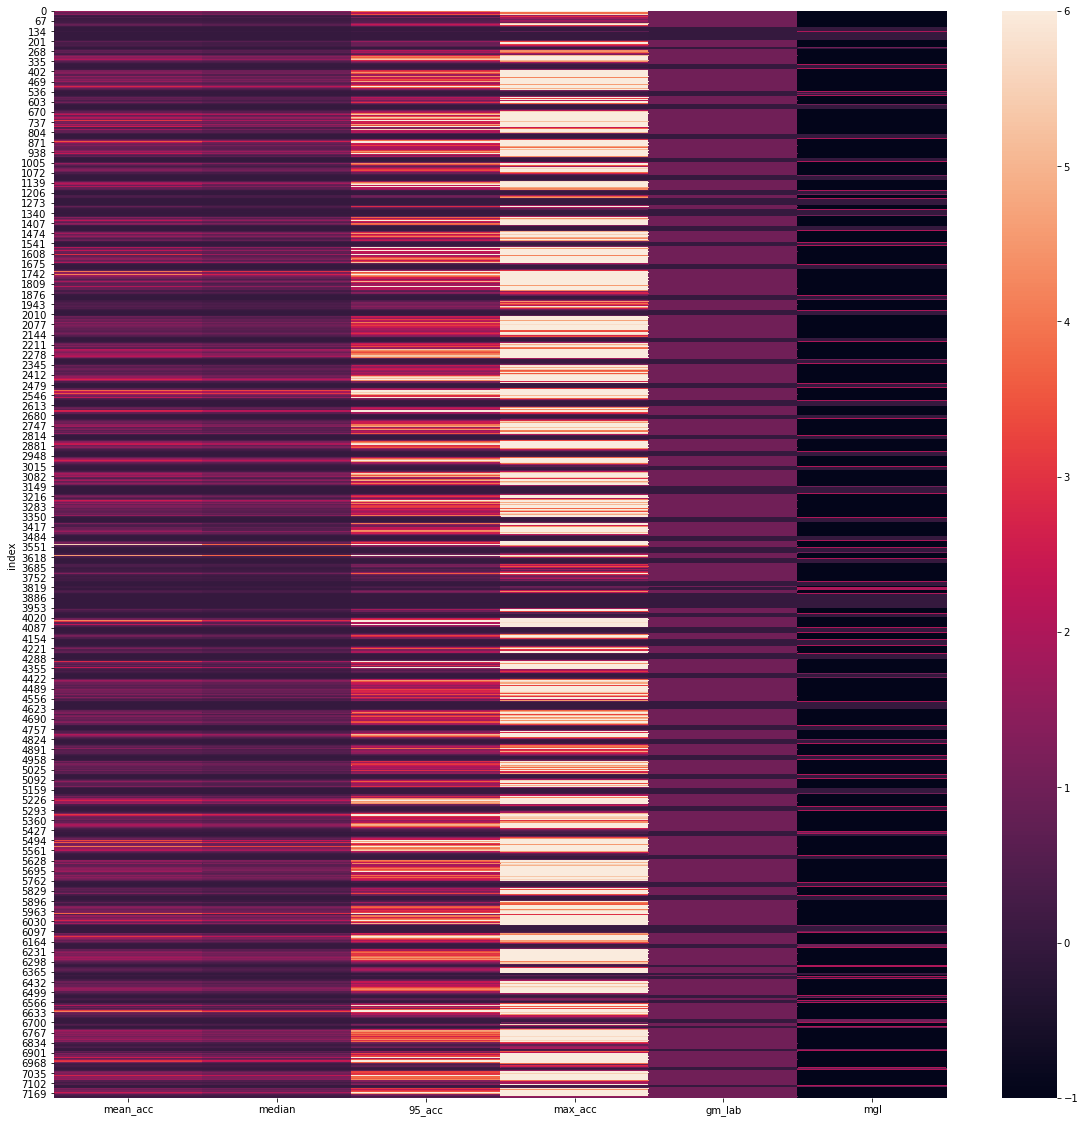

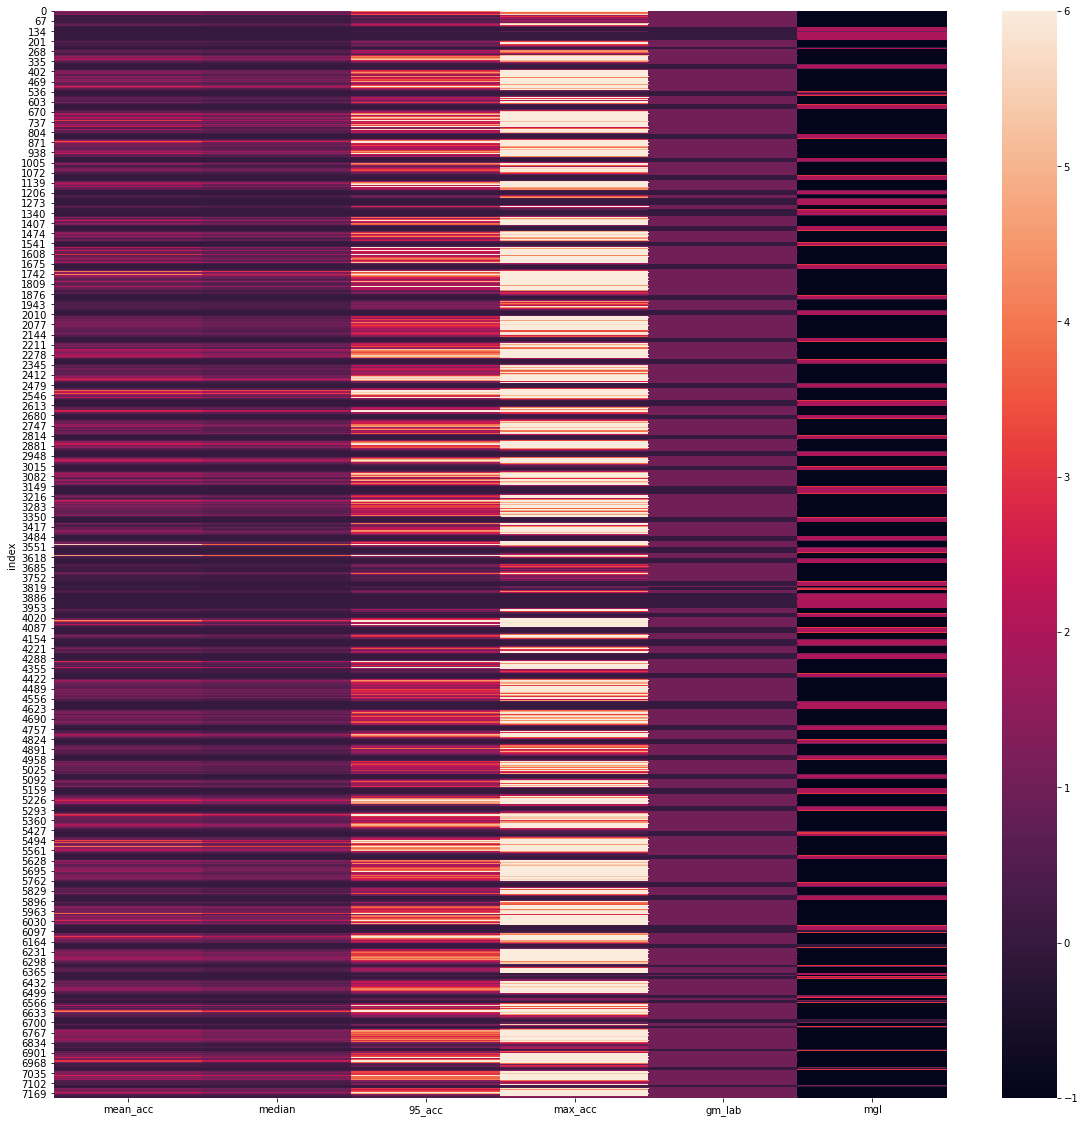

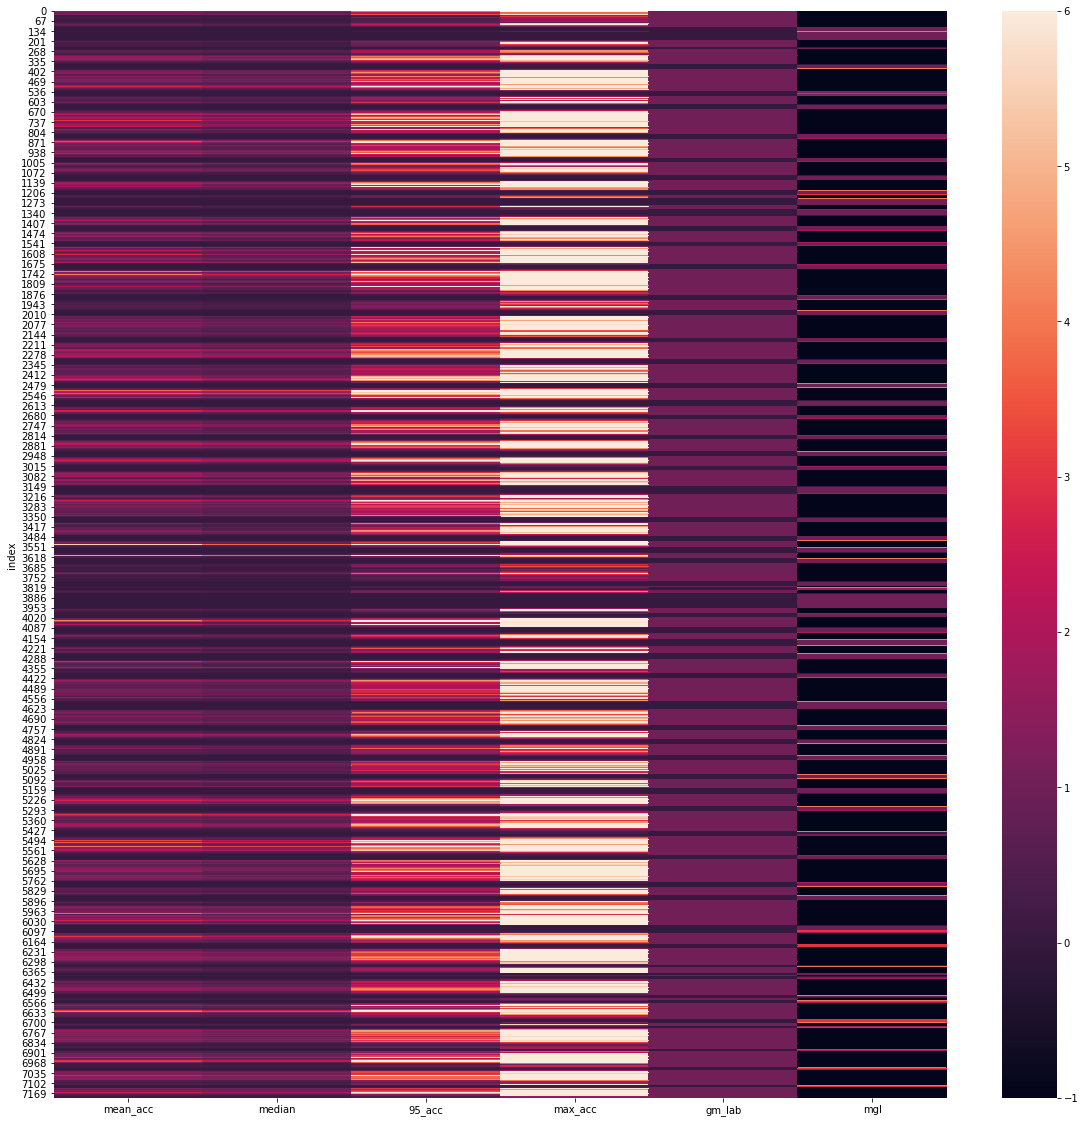

In [36]:
for i in np.arange(2, 6):
    gml = GaussianMixture(n_components = i).fit_predict(m2)
    m4 = m2.reset_index()
    m4["mgl"] = gml
#     print(m4.head())
    r1 = pd.concat([m4, s2])
#     print(r1.head())
    r1 = r1.set_index("index")
    r1 = r1.sort_index()
#     r1 = r1.drop("level_0", axis =1)
#     print(r1.head())
    r1.mgl = r1.mgl.fillna(-1)
    r1.gm_lab = (r1.gm_lab + 10 ) / 5
    plt.figure(figsize=(20,20))
    sb.heatmap(r1.iloc[:,-6:], vmin=-1, vmax=6)
    plt.show()

In [37]:
from sklearn.decomposition import PCA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 7199
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 14.6 MB


In [38]:
pca = PCA(n_components = 130).fit(df)
df_pca = pca.transform(df)

In [39]:

gm_lab_pca = GaussianMixture(n_components =2).fit_predict(df_pca)

In [40]:
df_pca_l = pd.DataFrame(df_pca)
df_pca_l["move"] = gm_lab_pca
df_pca_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Columns: 131 entries, 0 to move
dtypes: float64(130), int64(1)
memory usage: 7.2 MB


In [41]:
df_pca_l.describe()

0             1             2             3             4  \
count  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03   
mean   4.902251e-16  3.432902e-16 -9.758494e-17  1.895426e-18  1.892776e-18   
std    1.405528e+01  1.772102e+00  1.817271e-01  6.191964e-02  5.242873e-02   
min   -8.173987e+00 -1.637829e+01 -9.492383e-01 -4.185415e-01 -4.325788e-01   
25%   -7.819762e+00 -7.738359e-01 -6.441148e-02 -1.720293e-02 -9.386329e-03   
50%   -4.007036e+00  4.113694e-01  1.936106e-02  8.035454e-03 -5.020037e-03   
75%    1.382540e+00  1.201762e+00  5.829356e-02  9.886525e-03  9.212251e-03   
max    1.896365e+02  1.799160e+01  2.943603e+00  1.320038e+00  5.475886e-01   

                  5             6             7             8             9  \
count  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03   
mean   1.088924e-17 -3.467760e-18  2.295858e-18  1.207801e-18 -7.961417e-18   
std    4.664498e-02  4.189588e-02  3.807043e-02  3.555756e-02  3.245273e-02   
min   -4.619690e-01 -5.041007e-01 -2.604062e-01 -2.870261e-01 -2.263191e-01   
25%   -6.084452e-03 -1.313804e-02 -1.152541e-02 -6.054777e-03 -1.282932e-02   
50%   -3.820973e-03  6.434598e-03  2.313844e-03  5.834168e-05  6.333386e-05   
75%    1.492327e-02  1.035664e-02  3.822470e-03  7.201292e-03  5.419030e-03   
max    5.032530e-01  6.511802e-01  4.788477e-01  2.974867e-01  3.193618e-01   

       ...           121           122           123           124  \
count  ...  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03   
mean   ...  9.751043e-20  7.403595e-19 -2.964691e-19  5.943084e-19   
std    ...  3.210229e-03  3.175454e-03  3.137511e-03  3.096985e-03   
min    ... -2.683598e-02 -3.379929e-02 -2.143844e-02 -2.784185e-02   
25%    ... -9.131614e-04 -8.100291e-04 -9.641867e-04 -9.000857e-04   
50%    ...  1.350885e-05  3.416305e-05  3.042595e-04  1.514850e-04   
75%    ...  8.105458e-04  7.892642e-04  7.248258e-04  7.381086e-04   
max    ...  3.290050e-02  3.961764e-02  3.294077e-02  3.602193e-02   

                125           126           127           128           129  \
count  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03  7.200000e+03   
mean  -4.603342e-20  1.256154e-18 -4.613883e-20  4.640988e-20  1.947649e-19   
std    3.050466e-03  2.999224e-03  2.947918e-03  2.935480e-03  2.900942e-03   
min   -2.572432e-02 -2.688840e-02 -2.268143e-02 -2.353613e-02 -2.628014e-02   
25%   -9.347082e-04 -8.869374e-04 -8.915225e-04 -6.710395e-04 -8.089163e-04   
50%    2.238347e-04  7.218960e-05  1.481839e-04 -1.484555e-04  4.840555e-05   
75%    8.048050e-04  7.516786e-04  8.436314e-04  8.028773e-04  7.690974e-04   
max    2.991031e-02  2.900687e-02  2.863276e-02  2.434862e-02  2.851977e-02   

              move  
count  7200.000000  
mean      0.541528  
std       0.498307  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 131 columns]

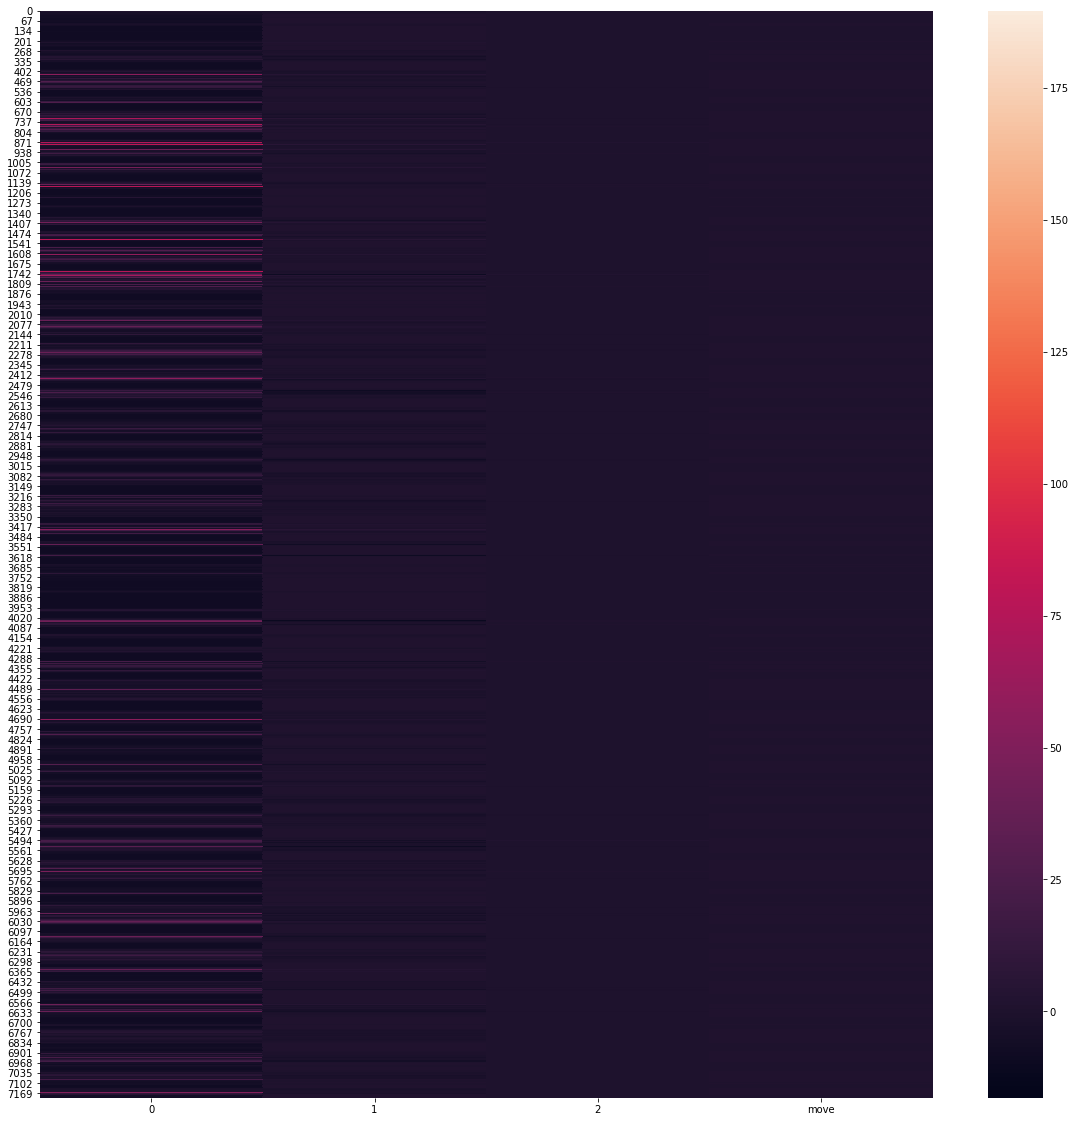

In [42]:
plt.figure(figsize=(20,20))
sb.heatmap(df_pca_l.iloc[:,[0,1,2,130]])
plt.show()